In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import matplotlib as plt

In [73]:
# Show all rows and columns
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', None)         # Don't wrap lines
pd.set_option('display.max_colwidth', None)  # Show full column text


In [44]:
# Prepare headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
}

# Lists to store all data
name = []
rating = []
reviews = []
industry_list = []
location_list = []
extra_locations_list = []

# Loop over 10 pages
for page in range(1, 501):
    print(f"Scraping page {page}...")
    url = f'https://www.ambitionbox.com/list-of-companies?page={page}'

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'lxml')
        company = soup.find_all('div', class_='companyCardWrapper')

        for i in company:
            # Company Name
            company_name = i.find('h2')
            name.append(company_name.text.strip() if company_name else 'N/A')

            # Company Rating
            rating_block = i.find('div', class_='rating_text')
            if rating_block:
                inner_rating = rating_block.find('div')
                rating.append(inner_rating.text.strip() if inner_rating else 'N/A')
            else:
                rating.append('N/A')

            # Company Review Count
            review_tag = i.find('span', class_='companyCardWrapper__companyRatingCount')
            reviews.append(review_tag.text.strip() if review_tag else 'N/A')

            # Industry, Location, Extra Locations
            interlink_tag = i.find_all(class_='companyCardWrapper__interLinking')
            if interlink_tag and len(interlink_tag) > 0:
                text = interlink_tag[0].text.strip()
                parts = text.split('|')
                industry = parts[0].strip()

                location_info = parts[1].strip() if len(parts) > 1 else ''
                if '+' in location_info:
                    location_part, extra_locations = location_info.split('+', 1)
                    location = location_part.strip()
                    extra = '+' + extra_locations.strip()
                else:
                    location = location_info
                    extra = 'N/A'
            else:
                industry = 'N/A'
                location = 'N/A'
                extra = 'N/A'

            industry_list.append(industry)
            location_list.append(location)
            extra_locations_list.append(extra)

        # Be polite to the server
        time.sleep(random.uniform(1, 3))

    except requests.exceptions.RequestException as e:
        print(f"Failed to scrape page {page}: {e}")

# Combine all data into a DataFrame
data = {
    'Company Name': name,
    'Rating': rating,
    'Reviews': reviews,
    'Industry': industry_list,
    'Location': location_list,
    'Extra Locations': extra_locations_list
}
df = pd.DataFrame(data)

# Preview
df.head()

# Optional: Save to CSV
df.to_csv('ambitionbox_10pages.csv', index=False)
print("Scraping complete. Data saved to ambitionbox_10pages.csv")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [48]:
df.head()

,Company Name,Rating,Reviews,Industry,Location,Extra Locations
0,TCS,3.6,(99k),IT Services & Consulting,Bangalore / Bengaluru,+413 other locations
1,Accenture,3.7,(63.8k),IT Services & Consulting,Bangalore / Bengaluru,+228 other locations
2,Wipro,3.7,(57.7k),IT Services & Consulting,Bangalore / Bengaluru,+357 other locations
3,Cognizant,3.7,(54.8k),IT Services & Consulting,Hyderabad / Secunderabad,+212 other locations
4,Capgemini,3.7,(46.5k),IT Services & Consulting,Bangalore / Bengaluru,+175 other locations


In [47]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company Name     9980 non-null   object
 1   Rating           9980 non-null   object
 2   Reviews          9980 non-null   object
 3   Industry         9980 non-null   object
 4   Location         9980 non-null   object
 5   Extra Locations  9980 non-null   object
dtypes: object(6)
memory usage: 467.9+ KB


Company Name       0
Rating             0
Reviews            0
Industry           0
Location           0
Extra Locations    0
dtype: int64

In [49]:
df['Rating'] = df['Rating'].astype(float)

In [50]:
df['Reviews'] = df['Reviews'].str.replace(r'[(),k]', '', regex=True).astype(float) * 1000


In [51]:
df['Extra Locations'] = df['Extra Locations'].str.extract(r'\+(\d+)').astype(float)

In [52]:
df[['Rating', 'Reviews', 'Extra Locations']].describe()

,Rating,Reviews,Extra Locations
count,9980.000000,9980.000000,9319.000000
mean,3.769118,225737.545090,35.401545
std,0.397716,188908.235021,71.787571
min,1.000000,1000.000000,1.000000
25%,3.500000,112000.000000,8.000000
50%,3.800000,161000.000000,17.000000
75%,4.000000,282000.000000,35.000000
max,5.000000,999000.000000,1711.000000


In [53]:
df.sort_values(by='Rating', ascending=False)[['Company Name', 'Rating']].head(5)

,Company Name,Rating
2218,Regulated Council of Immigration Consultants,5.0
1142,Royal Migration Solutions,4.9
817,NextComm Corporation,4.9
6036,Global Trade Plaza,4.9
5166,Sistema Shyam Teleservices,4.9


In [54]:
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Company Count']

In [55]:
df[['Rating', 'Reviews', 'Extra Locations']].corr()

,Rating,Reviews,Extra Locations
Rating,1.000000,0.021268,0.102972
Reviews,0.021268,1.000000,-0.031529
Extra Locations,0.102972,-0.031529,1.000000


<Axes: title={'center': 'Top 10 Companies by Review Count'}, xlabel='Company Name'>

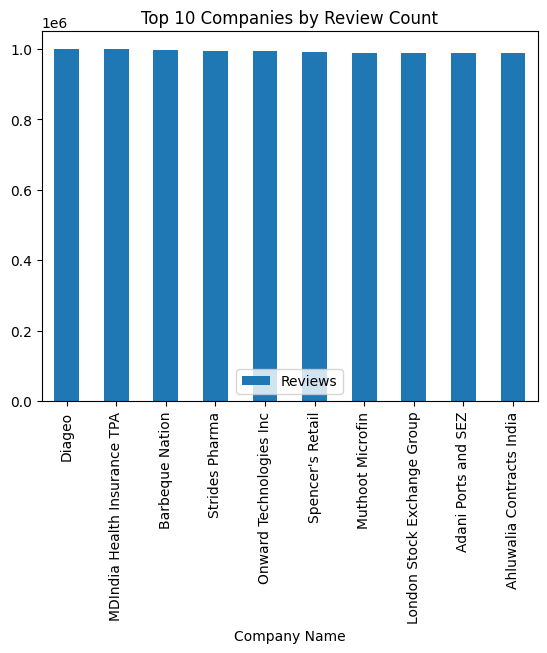

In [58]:
df.nlargest(10, 'Reviews').plot.bar(x='Company Name', y='Reviews', title='Top 10 Companies by Review Count')

<Axes: title={'center': 'Distribution of Company Ratings'}, ylabel='Frequency'>

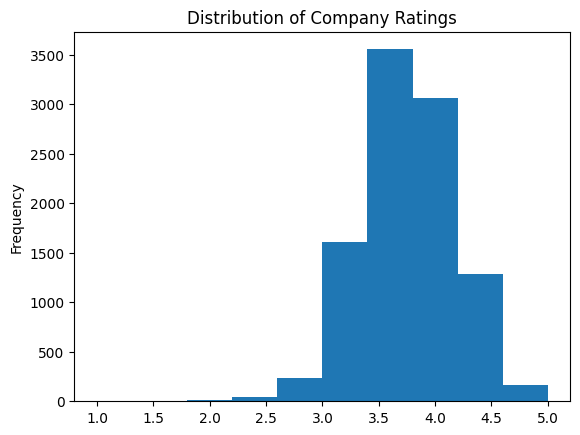

In [59]:
df['Rating'].plot.hist(bins=10, title='Distribution of Company Ratings')

<Axes: title={'center': 'Company Rating vs. Number of Reviews'}, xlabel='Reviews', ylabel='Rating'>

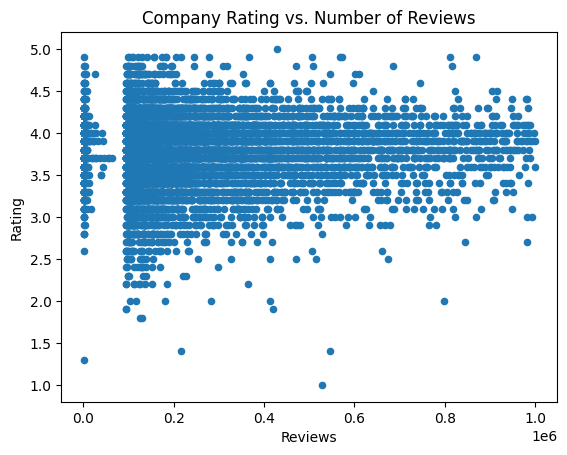

In [60]:
df.plot.scatter(x='Reviews', y='Rating', title='Company Rating vs. Number of Reviews')

In [61]:
industry_counts = df['Industry'].value_counts()
print(industry_counts)

Industry
IT Services & Consulting                        1288
Engineering & Construction                       473
Auto Components                                  422
Industrial Machinery                             391
Pharma                                           361
                                                ... 
Chennai +67 other locations                        1
Pune +90 other locations                           1
Hyderabad / Secunderabad +24 other locations       1
Pune +94 other locations                           1
Ahmedabad +20 other locations                      1
Name: count, Length: 497, dtype: int64


In [63]:
location_counts = df['Location'].value_counts()
location_counts


Location
Mumbai                   1462
Bangalore / Bengaluru    1431
New Delhi                 836
Chennai                   767
Pune                      747
                         ... 
Giridih                     1
Lalkuan                     1
Nagercoil                   1
Ranipet                     1
Hapur                       1
Name: count, Length: 239, dtype: int64

In [82]:
grouped = df.groupby(['Industry', 'Location']).size().reset_index(name='Company Count')
grouped

,Industry,Location,Company Count
0,Accounting & Auditing,Bangalore / Bengaluru,5
1,Accounting & Auditing,Chandigarh,2
2,Accounting & Auditing,Chennai,6
3,Accounting & Auditing,Daman & Diu,1
4,Accounting & Auditing,Gurgaon / Gurugram,5
5,Accounting & Auditing,Hyderabad / Secunderabad,2
6,Accounting & Auditing,Jaipur,1
7,Accounting & Auditing,Jamnagar,1
8,Accounting & Auditing,Kolkata,2
9,Accounting & Auditing,Mohali,1


In [81]:
df['Location'].unique()

array(['Bangalore / Bengaluru', 'Hyderabad / Secunderabad', 'Mumbai',
       'Chennai', 'Noida', 'Jamnagar', 'Pune', 'Gurgaon / Gurugram',
       'Jaipur', 'Kolkata', 'Jamshedpur', 'Ballari', 'Ahmedabad',
       'Vadodara', '', 'New Delhi', 'Hosur', 'Greater Noida', 'Varanasi',
       'Indore', 'Sambalpur', 'Angul', 'Faridabad', 'Bharuch', 'Nagpur',
       'Surat', 'Kanpur', 'Ankleshwar', 'Bhopal', 'Jajpur', 'Beawar',
       'Aurangabad', 'Guwahati', 'Patna', 'Thrissur', 'Hoshiarpur',
       'Haridwar', 'Mundra', 'Visakhapatnam', 'Anantapur', 'Neemrana',
       'New York', 'Bhiwadi', 'Kochi', 'Barnala', 'Baddi', 'Ghaziabad',
       'Coimbatore', 'Bhubaneswar', 'Anjar', 'Gwalior', 'Nashik',
       'Tirupati', 'Lucknow', 'Chaibasa', 'Valsad', 'Chandigarh',
       'Gandhinagar', 'Agra', 'Jaisalmer', 'Kharagpur', 'Mohali',
       'Bathinda', 'Vapi', 'Jharsuguda', 'Udaipur', 'Tuni', 'Bhuj',
       'Bawal', 'Madurai', 'Singrauli', 'Kota', 'Bhavnagar', 'Nimbahera',
       'Silvassa / Dadra & 

In [67]:
print(f"Number of unique locations: {df['Location'].nunique()}")

Number of unique locations: 239


In [78]:
avg_rating_by_location = df.groupby('Location')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
avg_rating_by_location

,Location,Rating
177,Prayagraj / Allahabad,4.500000
217,Thane,4.500000
236,Yamunanagar,4.400000
99,Jagdalpur,4.400000
34,Betul,4.400000
151,Nagercoil,4.400000
159,New York,4.400000
160,Neyveli,4.400000
131,Lalitpur,4.350000
72,Duliajan,4.300000


In [77]:
total_reviews_by_location = df.groupby('Location')['Reviews'].sum().reset_index().sort_values(by='Reviews', ascending=False)
total_reviews_by_location

,Location,Reviews
24,Bangalore / Bengaluru,335266300.0
146,Mumbai,329629000.0
158,New Delhi,188171400.0
53,Chennai,183365800.0
178,Pune,170088800.0
85,Gurgaon / Gurugram,168389000.0
96,Hyderabad / Secunderabad,165796500.0
0,,119470600.0
162,Noida,96214800.0
120,Kolkata,67776800.0


In [76]:
location_reach = df.groupby('Location')['Extra Locations'].mean().reset_index().sort_values(by='Extra Locations', ascending=False)
location_reach

,Location,Extra Locations
32,Beawar,243.000000
106,Jamnagar,164.500000
220,Thrissur,105.428571
161,Nimbahera,98.000000
183,Rajnandgaon,84.500000
93,Hoshiarpur,77.000000
230,Varanasi,76.000000
86,Guwahati,75.800000
189,Rewa,70.000000
62,Damoh,70.000000


In [74]:
summary = df.groupby('Location').agg({
    'Company Name': 'count',
    'Rating': 'mean',
    'Reviews': 'sum',
    'Extra Locations': 'mean'
}).reset_index().rename(columns={
    'Company Name': 'Company Count',
    'Rating': 'Avg Rating',
    'Reviews': 'Total Reviews',
    'Extra Locations': 'Avg Extra Locations'
}).sort_values(by='Company Count', ascending=False)

summary

,Location,Company Count,Avg Rating,Total Reviews,Avg Extra Locations
146,Mumbai,1462,3.769015,329629000.0,55.900068
24,Bangalore / Bengaluru,1431,3.720266,335266300.0,31.860936
158,New Delhi,836,3.823325,188171400.0,43.699158
53,Chennai,767,3.794654,183365800.0,34.881046
178,Pune,747,3.750602,170088800.0,28.652703
96,Hyderabad / Secunderabad,728,3.759203,165796500.0,26.198061
85,Gurgaon / Gurugram,664,3.746687,168389000.0,36.993976
0,,634,3.709464,119470600.0,NaN
162,Noida,447,3.719016,96214800.0,26.713647
120,Kolkata,293,3.709215,67776800.0,36.312715


In [83]:
df.sort_values(by='Rating', ascending=False).head(10)

,Company Name,Rating,Reviews,Industry,Location,Extra Locations
2218,Regulated Council of Immigration Consultants,5.0,428000.0,Dubai,,NaN
1142,Royal Migration Solutions,4.9,811000.0,Dubai +7 other locations,,NaN
817,NextComm Corporation,4.9,1100.0,Software Product,Bangalore / Bengaluru,10.0
6036,Global Trade Plaza,4.9,157000.0,Internet,Kanpur,4.0
5166,Sistema Shyam Teleservices,4.9,183000.0,Telecom,Gurgaon / Gurugram,43.0
6058,Global Trade Plaza,4.9,157000.0,Internet,Kanpur,4.0
2548,KaaShiv InfoTech Company,4.9,367000.0,EdTech,Chennai,4.0
8737,Armed Forces Tribunal,4.9,108000.0,Government,New Delhi,38.0
7294,Dr.SNS Rajalakshmi College Of Arts and Science,4.9,130000.0,Education & Training,Coimbatore,1.0
9594,Hanu Reddy Realty,4.9,98000.0,Real Estate,Chennai,5.0


In [84]:
df[df['Rating'] < 3.0].sort_values(by='Rating')

,Company Name,Rating,Reviews,Industry,Location,Extra Locations
1762,DM Immigration Consultant,1.0,529000.0,Bangalore / Bengaluru +3 other locations,,NaN
511,Stellar Migration,1.3,1700.0,Dubai +2 other locations,,NaN
4407,KFA Consultant,1.4,215000.0,Dubai +2 other locations,,NaN
1695,ZaranTech,1.4,545000.0,IT Services & Consulting,Bangalore / Bengaluru,17.0
7517,Nala Robotics,1.8,126000.0,Hyderabad / Secunderabad +3 other locations,,NaN
7290,Future Market Insights,1.8,130000.0,Analytics & KPO,Pune,1.0
9928,Arteria Technologies,1.9,94000.0,Software Product,Bangalore / Bengaluru,3.0
9887,Medsave Healthcare TPA,1.9,95000.0,Insurance,New Delhi,13.0
2220,MAQ Software,1.9,419000.0,IT Services & Consulting,Hyderabad / Secunderabad,9.0
5269,TalentServe,2.0,180000.0,Software Product,Mumbai,9.0


In [85]:
df.sort_values(by='Reviews', ascending=False).head(10)

,Company Name,Rating,Reviews,Industry,Location,Extra Locations
904,MDIndia Health Insurance TPA,3.6,999000.0,Insurance,Pune,81.0
903,Diageo,3.9,999000.0,Beverage,Bangalore / Bengaluru,92.0
905,Barbeque Nation,4.0,997000.0,Hospitality,Bangalore / Bengaluru,77.0
907,Strides Pharma,3.9,992000.0,Pharma,Bangalore / Bengaluru,32.0
908,Onward Technologies Inc,3.0,992000.0,IT Services & Consulting,Pune,63.0
909,Spencer's Retail,3.7,989000.0,Retail,Kolkata,60.0
910,Muthoot Microfin,4.1,988000.0,NBFC,Kochi,302.0
911,London Stock Exchange Group,3.9,988000.0,Financial Services,Bangalore / Bengaluru,12.0
912,Adani Ports and SEZ,3.8,987000.0,Ports & Shipping,Mundra,60.0
913,Ahluwalia Contracts India,4.0,987000.0,Engineering & Construction,New Delhi,55.0


In [86]:
df.sort_values(by='Extra Locations', ascending=False).head(10)

,Company Name,Rating,Reviews,Industry,Location,Extra Locations
5,HDFC Bank,3.9,43900.0,Banking,Mumbai,1711.0
15,Jio,4.1,25900.0,Telecom,Mumbai,1506.0
13,Axis Bank,3.7,28500.0,Banking,Mumbai,1433.0
7,ICICI Bank,4.0,42200.0,Banking,Mumbai,1399.0
17,Reliance Retail,3.9,24300.0,Retail,Mumbai,1101.0
39,Bajaj Finserv,4.0,10500.0,Financial Services,Pune,1056.0
53,Shriram Finance,4.0,7800.0,NBFC,Chennai,1044.0
20,HDB Financial Services,3.9,22400.0,NBFC,Mumbai,1040.0
43,Bandhan Bank,3.7,8800.0,Banking,Kolkata,923.0
51,Muthoot Fincorp,4.5,7800.0,NBFC,Bangalore / Bengaluru,918.0


<Axes: xlabel='Rating'>

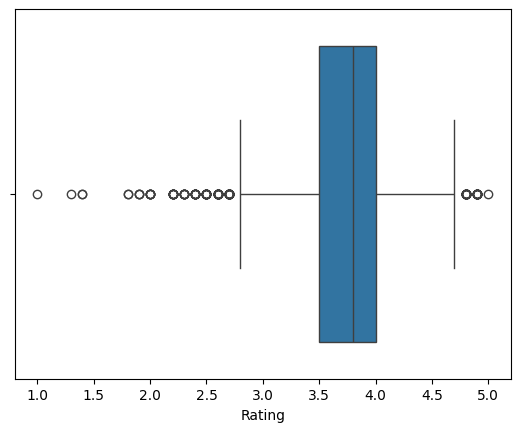

In [87]:
import seaborn as sns
sns.boxplot(x=df['Rating'])

In [88]:
df['Rating Segment'] = pd.cut(df['Rating'], bins=[0, 3, 3.5, 4, 5], labels=['Low', 'Average', 'Good', 'Excellent'])
df['Rating Segment'].value_counts()

Rating Segment
Good         5128
Excellent    2288
Average      2102
Low           462
Name: count, dtype: int64

In [89]:
df['Review Size'] = pd.cut(df['Reviews'], bins=[0, 50000, 100000, 200000, float('inf')],
                           labels=['<50k', '50k-100k', '100k-200k', '200k+'])

<Axes: xlabel='Extra Locations', ylabel='Rating'>

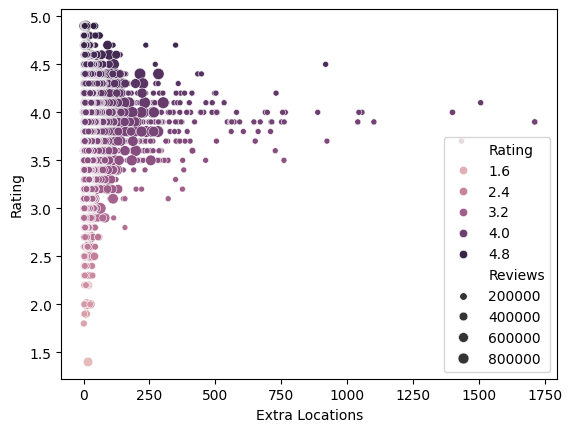

In [90]:
sns.scatterplot(data=df, x='Extra Locations', y='Rating', size='Reviews', hue='Rating')

In [91]:
top_locations = df['Location'].value_counts().head(10).index
df[df['Location'].isin(top_locations)].groupby('Location').agg({
    'Rating': 'mean',
    'Reviews': 'mean',
    'Company Name': 'count'
}).sort_values(by='Rating', ascending=False)

,Rating,Reviews,Company Name
Location,,,
New Delhi,3.823325,225085.406699,836
Chennai,3.794654,239068.839635,767
Mumbai,3.769015,225464.432285,1462
Hyderabad / Secunderabad,3.759203,227742.445055,728
Pune,3.750602,227695.850067,747
Gurgaon / Gurugram,3.746687,253597.891566,664
Bangalore / Bengaluru,3.720266,234288.120196,1431
Noida,3.719016,215245.637584,447
,3.709464,188439.432177,634
